En este caso se van a realizar las siguientes modificaciones:
1. Arquitectura: Resnet18
2. Porcentaje de validación : 0.3
3. Se ha hecho resize de las imagenes para que tengan un tamaño 50*100
4. Se ha probado usar una Resnet36 al final para ver las diferencias

In [46]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
from PIL import Image

In [47]:
torch.cuda.device_count()

1

In [48]:
def es_correcta(imagen): return imagen[0] == 'B'

En este caso vamos a probar con un porcentaje mas alto de validación

In [49]:
path = Path(r'/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo3/Completo')

In [50]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.3, bs=10, seed=42, num_workers=4,
    label_func=es_correcta
)

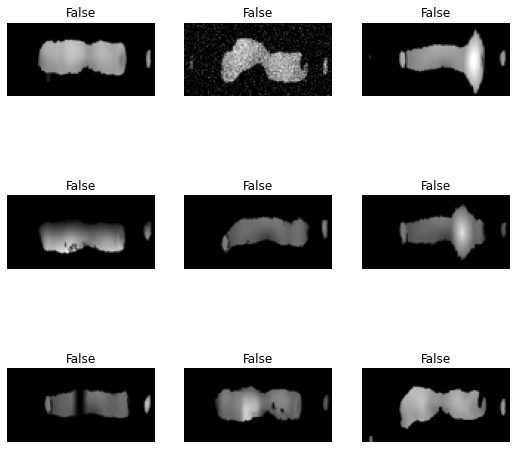

In [51]:
dls.show_batch()

In [52]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=2.75422871709452e-06)

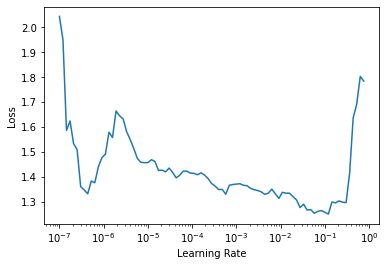

In [53]:
learn.lr_find()

In [54]:
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.227552,0.234867,0.918768,00:32
1,0.206140,0.195553,0.907563,00:32
2,0.190785,0.199229,0.918768,00:32


In [55]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

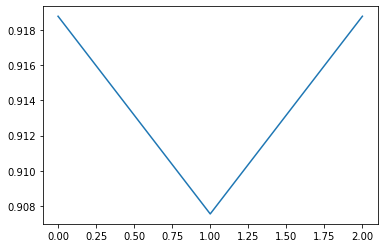

In [56]:
plt.plot(L(learn.recorder.values).itemgot(2))

En este caso hemos obtenido una curva con un crecimiento muy lento lo cual puede indicar un learning rate bajo.

In [57]:
learn.recorder.values

[(#3) [0.22755247354507446,0.234866663813591,0.918767511844635],
 (#3) [0.20614035427570343,0.1955527514219284,0.9075630307197571],
 (#3) [0.19078481197357178,0.19922874867916107,0.918767511844635]]

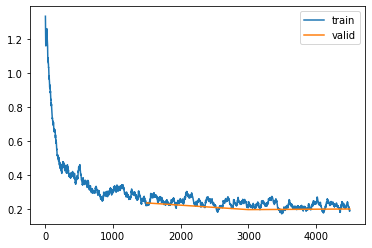

In [58]:
learn.recorder.plot_loss()

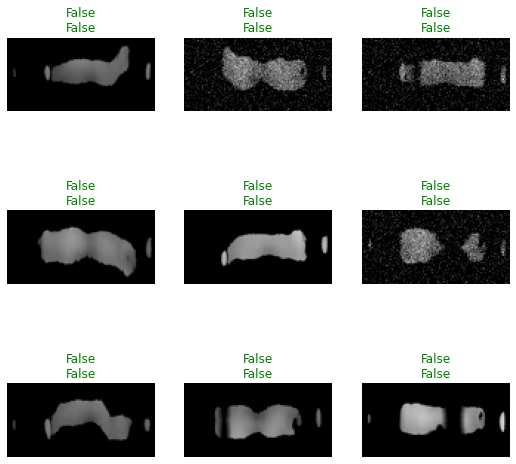

In [59]:
learn.show_results()

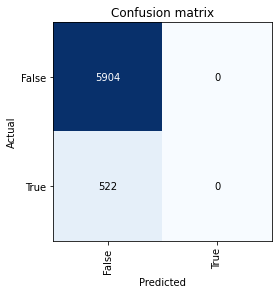

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [62]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [63]:
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.264586,0.233146,0.918768,00:51
1,0.230355,0.194839,0.916122,00:52
2,0.199509,0.185014,0.918768,00:53
